In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=80)
print(faces.target_names)
print(faces.images.shape)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
(1140, 62, 47)


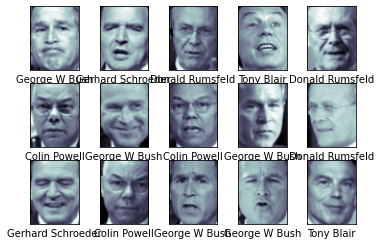

In [10]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [11]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='linear', class_weight='balanced')
model = make_pipeline(pca, svc)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=42)


In [13]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50]}
grid = GridSearchCV(model, param_grid)

grid.fit(X_train, y_train)
print(grid.best_params_)

{'svc__C': 1}


In [14]:
model = grid.best_estimator_
y_pred = model.predict(X_test)


Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

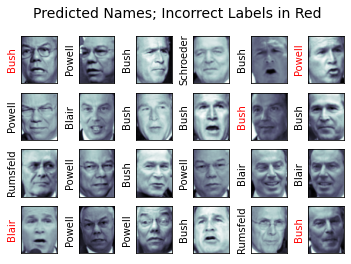

In [15]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[y_pred[i]].split()[-1], color='black' if y_pred[i] == y_test[i] else 'red')

fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=faces.target_names))


                   precision    recall  f1-score   support

     Colin Powell       0.81      0.86      0.83        64
  Donald Rumsfeld       0.78      0.88      0.82        32
    George W Bush       0.88      0.85      0.86       127
Gerhard Schroeder       0.92      0.76      0.83        29
       Tony Blair       0.74      0.76      0.75        33

         accuracy                           0.84       285
        macro avg       0.82      0.82      0.82       285
     weighted avg       0.84      0.84      0.84       285



Text(91.68, 0.5, 'Predicted label')

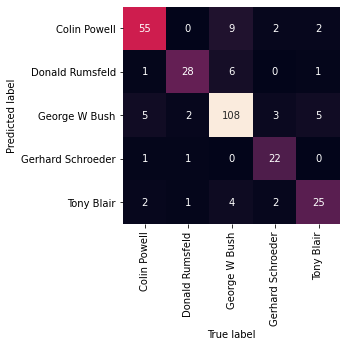

In [17]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('True label')
plt.ylabel('Predicted label')


## SVM总结
**优点**
* 模型只需要保存支持向量，模型占用内存少，预测快
* 分类只取决于支持向量，适合数据维度高的情况，例如DNA数据

**缺点**
* 训练的时间复杂度高，数据量巨大时不适用
* 需要做调参(C)，数据量大时非常耗时
